In [1]:
import pandas as pd
import os

path = os.environ["DFDATA"] + '/h9gi-nx95/1428430582/h9gi-nx95'
data = pd.read_csv(path)

data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/04/2015,9:25,MANHATTAN,10001.0,40.750788,-74.005630,"(40.7507879, -74.0056304)",WEST 26 STREET,11 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3197298,PICK-UP TRUCK,LIVERY VEHICLE,NaN,NaN,NaN
1,04/04/2015,21:15,QUEENS,11357.0,40.781291,-73.814200,"(40.7812915, -73.8141997)",20 AVENUE,150 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3198105,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,04/04/2015,16:52,QUEENS,11385.0,40.702595,-73.855293,"(40.7025952, -73.8552926)",WOODHAVEN BOULEVARD,MYRTLE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3197589,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN
3,04/04/2015,9:30,MANHATTAN,10025.0,40.804886,-73.962474,"(40.8048862, -73.9624735)",WEST 113 STREET,AMSTERDAM AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3197369,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
4,04/04/2015,9:41,QUEENS,11428.0,40.715144,-73.749356,"(40.7151436, -73.7493556)",211 STREET,JAMAICA AVENUE,NaN,...,NaN,NaN,NaN,NaN,3197601,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [41]:
data.columns
data = data[['DATE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]
data['SUMMARY'] = data['NUMBER OF PERSONS INJURED'] + data['NUMBER OF PERSONS KILLED']
data.DATE = pd.to_datetime(data['DATE'], format='%m/%d/%Y')
data = data.groupby('DATE', as_index=False).sum()
data.head()
data.shape

(1008, 4)

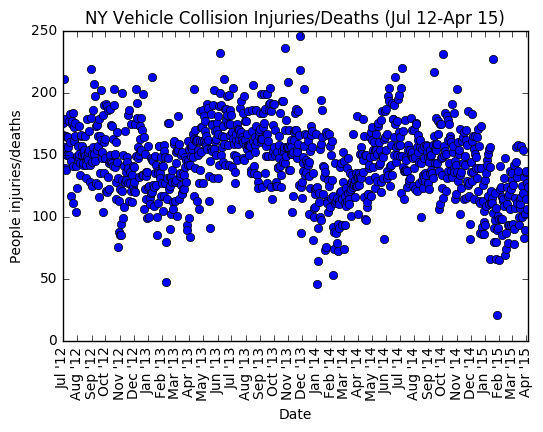

In [44]:
import matplotlib.pylab as plt
from matplotlib.dates import MonthLocator, DateFormatter
months = MonthLocator() 
yearsFmt = DateFormatter('%Y')
%matplotlib inline
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(monthsFmt)
plt.plot_date(data.DATE, data.SUMMARY)
plt.xlabel('Date')
plt.ylabel('People injuries/deaths')
plt.title('NY Vehicle Collision Injuries/Deaths (Jul 12-Apr 15)')
plt.xticks(rotation=90)
plt.show()

## Figure 1:

Shows injuries/deaths from vehicle collision recorded by NYPD (July 2012-April 2015). A seasonal trend is observed, with less injuries happening during winter months.